#About the dataset
This dataset includes data that were used for heart disease diagnosis.

There are features such as age, sex, blood sugar & pressure, heart rate, etc.

cp means chest pain and oldpeak is the indicator of ST depression and num is our main target.

Our main objective is to predict "num" which is represented by binary values with 0 & 1. 

While 0 means no heart attack, 1 represents the presence of heart attack.

# Importing required libraries and loading the data

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv('data.csv')
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [ ]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


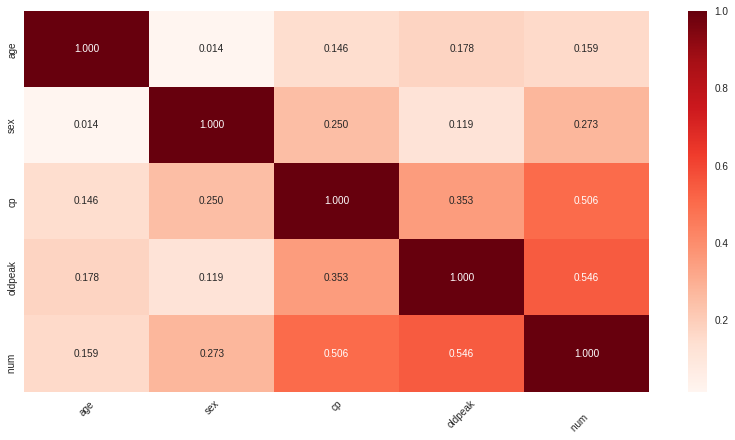

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(), annot=True,fmt="0.3f",cmap="Reds")
plt.xticks(rotation=45);

Based on the heatmap above, correlation on cp(chest pain) and num(our main target and also known as "attack") and between oldpeak(st depression) and num have been detected.

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [ ]:
# Renaming column 'num' to 'target'
df.rename(columns={'num       ': 'target'}, inplace=True)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


we can see that there are question marks in some columns so we will replace it with null

In [ ]:
df.replace("?", np.nan, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [ ]:
#CHANGING OBJECT COLUMNS TO FLOAT
df = df.astype({'trestbps':'float64',
                'chol': 'float64',
                'fbs': 'float64',
                'restecg': 'float64',
                'thalach': 'float64',
                'exang': 'float64',
                'slope': 'float64',
                'thal' : 'float64'})

In [ ]:
df.age.isnull().sum()

0

In [ ]:
sns.set_style("whitegrid")

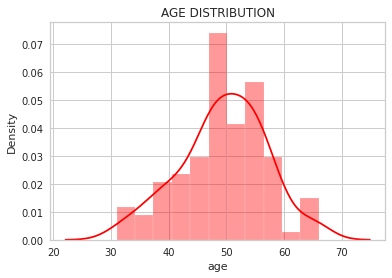

In [ ]:
#HEART ATTACK DISTRIBUTION
attack_data = df[df.target==1]
ax= sns.distplot(attack_data.age, color='red' )
plt.title("AGE DISTRIBUTION")
plt.show()

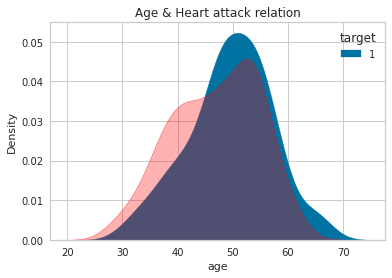

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
plt.title("Age & Heart attack relation")
sns.kdeplot(data=df[df.target==1],x='age',hue = "target", shade=True,ax = ax1 ,color='blue',alpha=1)
sns.kdeplot(data=df[df.target==0],x='age',shade=True,ax = ax1,color='red',alpha=0.3);

### Removing Null values

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         22
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       189
ca          290
thal        265
target        0
dtype: int64

In [ ]:
df.trestbps.fillna(df["trestbps"].mean(), inplace=True)

In [ ]:
df.trestbps.isnull().sum()

0

In [ ]:
df.chol.fillna(df["chol"].mean(), inplace=True)

In [ ]:
df.chol.isnull().sum()

0

In [ ]:
df.fbs.unique()

array([ 0., nan,  1.])

In [ ]:
df.fbs.fillna(0, inplace=True) #mode value is 0

In [ ]:
df.fbs.isnull().sum()

0

In [ ]:
df.restecg.mode()

0    0.0
dtype: float64

In [ ]:
df.restecg.fillna(0, inplace=True)

In [ ]:
df.thalach.fillna(df["thalach"].median(), inplace=True)

In [ ]:
df.exang.isnull().sum()

1

In [ ]:
df.exang.value_counts(dropna=False)

0.0    203
1.0     89
NaN      1
Name: exang, dtype: int64

In [ ]:
df.exang.fillna(0, inplace=True)

In [ ]:
df.slope.isnull().sum()

189

In [ ]:
df.ca.isnull().sum() 

290

In [ ]:
df.thal.isnull().sum() 

265

In [ ]:
df.drop(columns= ["slope","ca","thal"], inplace=True)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

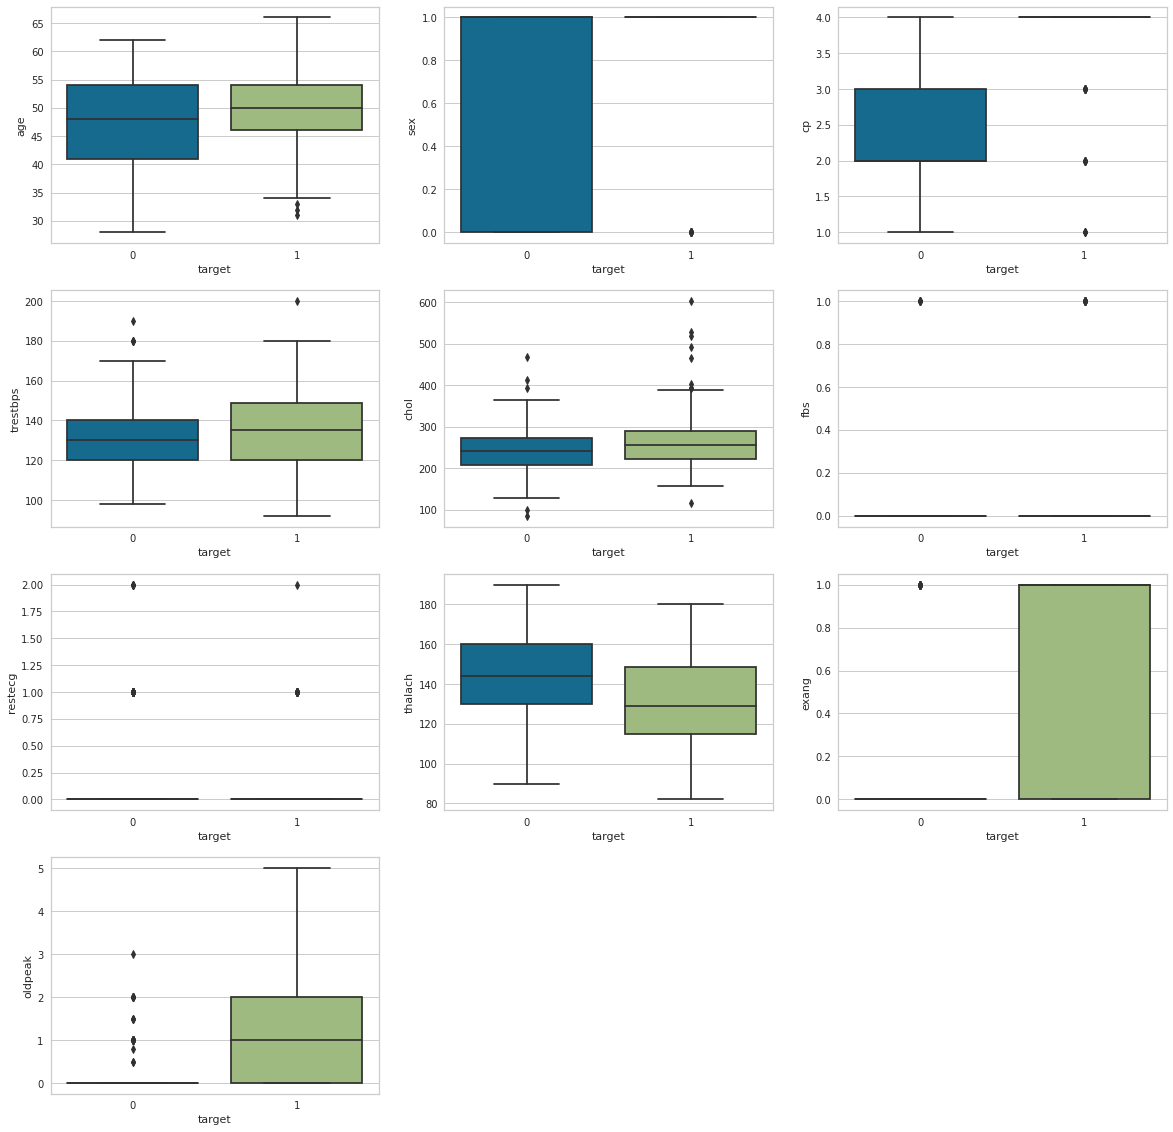

In [ ]:
numerical= df.drop(['target'], axis=1).select_dtypes('number').columns
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "target":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='target', y=feature, data=df)

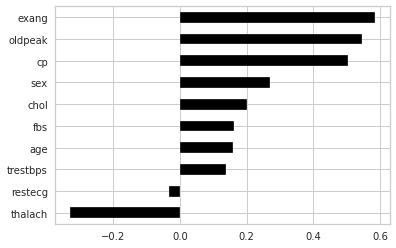

In [ ]:
df.corr()['target'].sort_values().drop('target').plot(kind = 'barh', color="black");
# Correlation of the target column with other columns

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.classifier import PrecisionRecallCurve

In [ ]:
 def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print("confussion matrix")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("confussion matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

#Logistic Regression

Preprocessing

In [ ]:
log_df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang'])

In [ ]:
#scaling numerical features
scaler = StandardScaler()
columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
log_df[columns] = scaler.fit_transform(log_df[columns])

In [ ]:
log_df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0.0,fbs_1.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0
0,-2.537605,-0.151650,-1.829907e+00,1.953350,-0.647637,0,0,1,0,1,0,0,1,0,0,0,1,1,0
1,-2.409588,-0.721555,-1.208462e-01,0.890327,-0.647637,0,0,1,0,1,0,0,1,0,1,0,0,1,0
2,-2.409588,0.418256,-4.376076e-16,1.315537,-0.647637,0,0,1,0,1,0,0,1,0,1,0,0,1,0
3,-2.281572,2.127973,-2.132278e-01,1.315537,-0.647637,0,1,0,1,0,0,0,1,0,0,1,0,1,0
4,-2.153556,-1.861367,-4.903729e-01,0.465118,-0.647637,0,1,0,0,1,0,0,1,0,0,1,0,1,0


In [ ]:
X= log_df.drop(["target"], axis=1)
y= log_df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[34  4]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.80      0.76      0.78        21

    accuracy                           0.85        59
   macro avg       0.84      0.83      0.83        59
weighted avg       0.85      0.85      0.85        59


Train_Set
confussion matrix
[[136  13]
 [ 25  60]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       149
           1       0.82      0.71      0.76        85

    accuracy                           0.84       234
   macro avg       0.83      0.81      0.82       234
weighted avg       0.84      0.84      0.83       234



In [ ]:
log_model=LogisticRegression( C=0.2, max_iter = 200, class_weight="balanced")  
log_model.fit(X_train, y_train)
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[32  6]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.75      0.86      0.80        21

    accuracy                           0.85        59
   macro avg       0.83      0.85      0.84        59
weighted avg       0.86      0.85      0.85        59


Train_Set
confussion matrix
[[128  21]
 [ 22  63]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       149
           1       0.75      0.74      0.75        85

    accuracy                           0.82       234
   macro avg       0.80      0.80      0.80       234
weighted avg       0.82      0.82      0.82       234



In [ ]:
y_pred = log_model.predict(X_test)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

Grid Search for Logistic Regression (Hyperparameter Tuning)

In [ ]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10)
max_iter = [100, 150, 200, 250, 300, 350, 400]
param_grid = {"penalty" : penalty,
             "C" : C,
              "max_iter" : max_iter}

In [ ]:
log_grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=5) 

In [ ]:
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.2, class_weight='balanced',
                                          max_iter=200),
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'max_iter': [100, 150, 200, 250, 300, 350, 400],
                         'penalty': ['l1', 'l2']})

In [ ]:
log_grid_model.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test) 

Test_Set
confussion matrix
[[32  6]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.75      0.86      0.80        21

    accuracy                           0.85        59
   macro avg       0.83      0.85      0.84        59
weighted avg       0.86      0.85      0.85        59


Train_Set
confussion matrix
[[131  18]
 [ 22  63]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       149
           1       0.78      0.74      0.76        85

    accuracy                           0.83       234
   macro avg       0.82      0.81      0.81       234
weighted avg       0.83      0.83      0.83       234



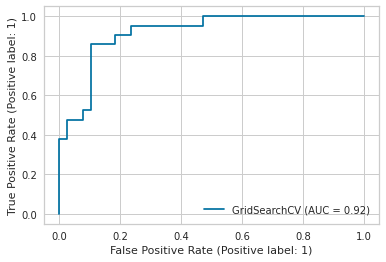

In [ ]:
plot_roc_curve(log_grid_model, X_test, y_test);

from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
fpr_log,tpr_log,thres_log = roc_curve(yte, ypred_xte)
log_precision, log_recall, log_thres = precision_recall_curve(yte, ypred_xte)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(yte, ypred_xte))


ax[1].pl
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
fpr_log,tpr_log,thres_log = roc_curve(yte, ypred_xte)
log_precision, log_recall, log_thres = precision_recall_curve(yte, ypred_xte)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(yte, ypred_xte))


ax[1].pl

# Random Forest

The other model that will be used is Random Forest that represents bagging method. This method has been more resistant to overfitting than Decision Tree. While some decisions have been combined by a decision tree,several decision trees have been combined by a random forest. Thus, decision tree works well on large datasets rapidly. But since our dataset is not too large we used Random Forest here rather than Decision tree.

Preprocessing

Since tree-based models like Random Forest doesn't need scaling and get dummies, the original data has been used here.

In [ ]:
X= df.drop(["target"], axis=1)
y= df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)
# before tuning
# As we see, there is overfitting. Now I will try to decrease it by tuning the hyperparameters.

Test_Set
confussion matrix
[[34  4]
 [ 7 14]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        38
           1       0.78      0.67      0.72        21

    accuracy                           0.81        59
   macro avg       0.80      0.78      0.79        59
weighted avg       0.81      0.81      0.81        59


Train_Set
confussion matrix
[[149   0]
 [  0  85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        85

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234



In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced",max_depth=2, random_state=10)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)
# After tuning many times manually, for the random forest model, these parameters gave the best scores. 
# Now I will display its precision-recall curve and Roc Curve.

Test_Set
confussion matrix
[[34  4]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.80      0.76      0.78        21

    accuracy                           0.85        59
   macro avg       0.84      0.83      0.83        59
weighted avg       0.85      0.85      0.85        59


Train_Set
confussion matrix
[[135  14]
 [ 23  62]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       149
           1       0.82      0.73      0.77        85

    accuracy                           0.84       234
   macro avg       0.84      0.82      0.82       234
weighted avg       0.84      0.84      0.84       234



Grid Search for Random Forest (Hyperparameter Tuning)

In [ ]:
param_grid = {'n_estimators':[50, 64, 100, 128, 200, 300],  
              'criterion': [ "gini", "entropy"],  
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[2,3, 5, 7],
             'min_samples_split':[2, 5, 8]}

In [ ]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "f1").fit(X_train, y_train)

In [ ]:
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 2,
 'min_samples_split': 5,
 'n_estimators': 64}

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[33  5]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.76      0.76      0.76        21

    accuracy                           0.83        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59


Train_Set
confussion matrix
[[143   6]
 [  8  77]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       149
           1       0.93      0.91      0.92        85

    accuracy                           0.94       234
   macro avg       0.94      0.93      0.93       234
weighted avg       0.94      0.94      0.94       234



The Random Forest model above which has been manually tuned gave better score than grid search results, so I saved its scores.

In [ ]:
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

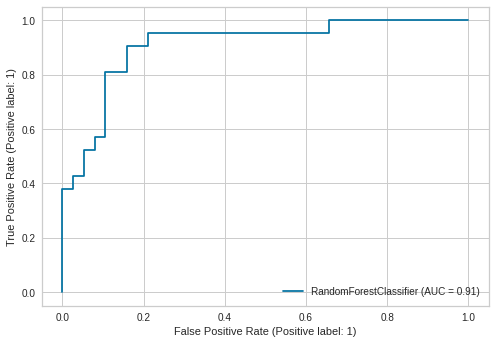

In [ ]:
plot_roc_curve(rf_model, X_test, y_test);  

#GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_model = GradientBoostingClassifier(random_state=10)
grad_model.fit(X_train, y_train)
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[35  3]
 [ 8 13]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        38
           1       0.81      0.62      0.70        21

    accuracy                           0.81        59
   macro avg       0.81      0.77      0.78        59
weighted avg       0.81      0.81      0.81        59


Train_Set
confussion matrix
[[149   0]
 [  1  84]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       149
           1       1.00      0.99      0.99        85

    accuracy                           1.00       234
   macro avg       1.00      0.99      1.00       234
weighted avg       1.00      1.00      1.00       234



Grid Search for Gradient Boosting (Hyperparamater Tuning)

In [ ]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.5, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1],
              'max_depth':[3,4,5,6]}

In [ ]:
gb_model = GradientBoostingClassifier(random_state=10)

In [ ]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1").fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
eval_metric(grid, X_train, y_train, X_test, y_test)

In [ ]:
gb_model = GradientBoostingClassifier(random_state=10, learning_rate= 0.02, max_depth= 2, max_features= 6,
                                      n_estimators= 200, subsample= 0.2)
gb_model.fit(X_train, y_train)
eval_metric(gb_model, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[33  5]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        38
           1       0.76      0.76      0.76        21

    accuracy                           0.83        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59


Train_Set
confussion matrix
[[136  13]
 [ 24  61]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       149
           1       0.82      0.72      0.77        85

    accuracy                           0.84       234
   macro avg       0.84      0.82      0.82       234
weighted avg       0.84      0.84      0.84       234



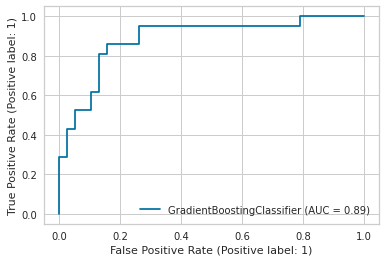

In [ ]:
plot_roc_curve(gb_model, X_test, y_test);

In [ ]:
y_pred = gb_model.predict(X_test)
gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

#XG Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=10).fit(X_train, y_train)
eval_metric(xgb, X_train, y_train, X_test, y_test)
# before tuning

Test_Set
confussion matrix
[[34  4]
 [ 9 12]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        38
           1       0.75      0.57      0.65        21

    accuracy                           0.78        59
   macro avg       0.77      0.73      0.74        59
weighted avg       0.78      0.78      0.77        59


Train_Set
confussion matrix
[[147   2]
 [  8  77]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       149
           1       0.97      0.91      0.94        85

    accuracy                           0.96       234
   macro avg       0.96      0.95      0.95       234
weighted avg       0.96      0.96      0.96       234



There is overfitting for the model. I will tune it.

In [ ]:
xgb = XGBClassifier(random_state=10, max_depth=2, learning_rate=0.1, scale_pos_weight=3, subsample=0.1).fit(X_train, y_train)
eval_metric(xgb, X_train, y_train, X_test, y_test)
# after tuning

Test_Set
confussion matrix
[[32  6]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.75      0.86      0.80        21

    accuracy                           0.85        59
   macro avg       0.83      0.85      0.84        59
weighted avg       0.86      0.85      0.85        59


Train_Set
confussion matrix
[[126  23]
 [ 14  71]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       149
           1       0.76      0.84      0.79        85

    accuracy                           0.84       234
   macro avg       0.83      0.84      0.83       234
weighted avg       0.85      0.84      0.84       234



Grid Search for XG Boost ( Hyperparameter Tuning)

In [ ]:
param_grid = {"n_estimators":[50, 100, 200, 250],
              'max_depth':[4,6,8],
              "learning_rate": [0.1, 0.2],
              "subsample":[0.5, 1, 1.5],
              "colsample_bytree":[0.5,0.7, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=10)

In [ ]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1").fit(X_train, y_train)

In [ ]:
xgb_grid.best_params_

In [ ]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[34  4]
 [ 7 14]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        38
           1       0.78      0.67      0.72        21

    accuracy                           0.81        59
   macro avg       0.80      0.78      0.79        59
weighted avg       0.81      0.81      0.81        59


Train_Set
confussion matrix
[[146   3]
 [ 11  74]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       149
           1       0.96      0.87      0.91        85

    accuracy                           0.94       234
   macro avg       0.95      0.93      0.93       234
weighted avg       0.94      0.94      0.94       234



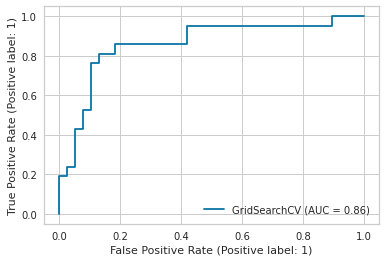

In [ ]:
plot_roc_curve(xgb_grid, X_test, y_test);  # Roc curve

In [ ]:
y_pred = xgb.predict(X_test)
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

Comparing Different Models

Now I will compare all the scores I got from different models by visualizing their f1, recall, and roc-auc scores.

In health datasets, recall is more impactful than precision. Therefore, we will prefer recall scores of the models rather than precision.

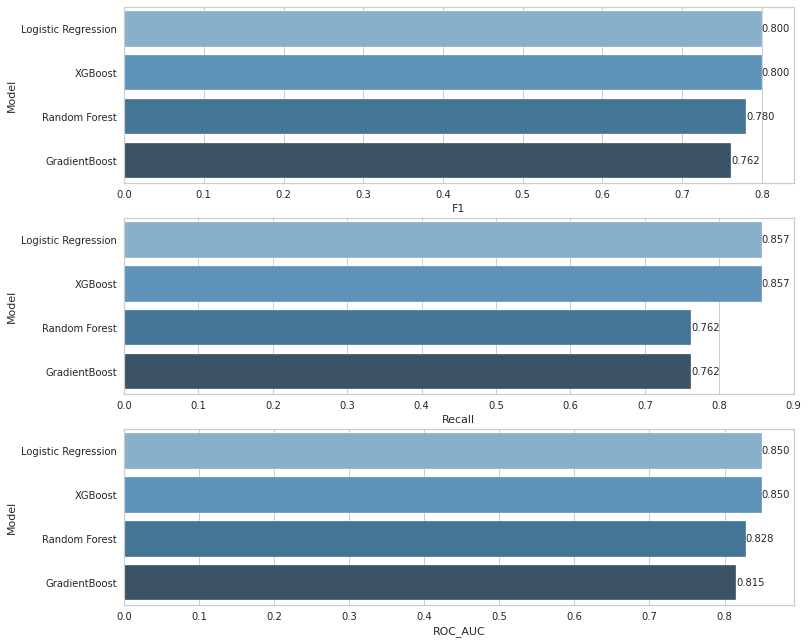

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest", "GradientBoost", "XGBoost"],
                        
                        "F1": [log_f1, rf_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, rf_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, rf_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,   
                '{:1.3f}'.format(width),             
                ha = 'left',                         
                va = 'center')                       
    
plt.figure(figsize=(12,11))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Conclusion:

There is no big difference between models in terms of score; however, as recall score is more important in health datasets, Logistic Regression model has been chosen as our final model.